
---



## 1.

In [ ]:
import pandas as pd
import numpy as np
import statistics
import matplotlib . pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import geopandas as gpd

In [ ]:
dados = []
dados = list(map(float, input().split()))

df = pd.DataFrame(dados, columns=['Numeros'])


1 2 3 4 5


In [ ]:
def AED(df):
  dados = df.iloc[:,0]

  print("Escolha o tipo de medida estatística:")
  print("1 - Medidas de Posição")
  print("2 - Medidas de Dispersão")
  tipo = input("Digite 1 ou 2: ")

  match tipo:
    case '1':
      print("\nMedidas de Posição disponíveis:")
      print("a - Moda")
      print("b - Média")
      print("c - Mediana")
      print("d - Percentis e Quartis")
      escolha = input("Escolha a medida (a, b, c ou d): ")

      match escolha:
        case 'a':
          try:
            print(f"Moda: {list(dados.mode())}")
          except :
            print("Amostra multimodal (não há uma única moda)")
        case 'b':
          print(f"Média: {np.mean(dados)}")
        case 'c':
          print(f"Mediana: {np.median(dados)}")
        case 'd':
          print("Quartis e Percentis:")
          print(f"Q1 (25%): {np.percentile(dados,25):.2f}")
          print(f"Q2 (50% - Mediana): {np.percentile(dados,50):.2f}")
          print(f"Q3 (75%): {np.percentile(dados,75):.2f}")
          p = float(input("Digite um percentil entre 0 e 100 (ex: 90): "))
          print(f"{p}º percentil: {np.percentile(dados,p):.2f}")
        case _:
          print("Opção inválida.")
    case '2':
      print("\nMedidas de Dispersão disponíveis:")
      print("a - Amplitude")
      print("b - Intervalo Interquartil (IIQ)")
      print("c - Variância")
      print("d - Desvio Padrão")
      print("e - Coeficiente de Variação")
      escolha = input("Escolha a medida (a, b, c, d ou e): \n")

      match escolha:
        case 'a':
            print(f"Amplitude: {np.max(dados) - np.min(dados)}")
        case 'b':
            iiq = np.percentile(dados, 75) - np.percentile(dados, 25)
            print(f"Intervalo Interquartil (IIQ): {iiq}")
        case 'c':
            print(f"Variância: {np.var(dados, ddof=1)}")
        case 'd':
            print(f"Desvio Padrão: {np.std(dados, ddof=1)}")
        case 'e':
            media = np.mean(dados)
            desvio = np.std(dados, ddof=1)
            if media != 0:
                cv = (desvio / media) * 100
                print(f"Coeficiente de Variação: {cv:.2f}%")
            else:
                print("Coeficiente de Variação indefinido (média = 0)")
        case _:
            print("Opção inválida.")
    case _:
      print("Tipo de medida inválido.")


In [ ]:
AED(df)

Escolha o tipo de medida estatística:
1 - Medidas de Posição
2 - Medidas de Dispersão
Digite 1 ou 2: 1

Medidas de Posição disponíveis:
a - Moda
b - Média
c - Mediana
d - Percentis e Quartis
Escolha a medida (a, b, c ou d): b
Média: 3.0


In [ ]:
AED(df)

Escolha o tipo de medida estatística:
1 - Medidas de Posição
2 - Medidas de Dispersão
Digite 1 ou 2: 2

Medidas de Dispersão disponíveis:
a - Amplitude
b - Intervalo Interquartil (IIQ)
c - Variância
d - Desvio Padrão
e - Coeficiente de Variação
Escolha a medida (a, b, c, d ou e): 
c
Variância: 2.5


## 2.

### a)

#### **<font color="#ff7f0e">IDH (Índice de Desenvolvimento Humano)</font>**  
**O que é?**  
<font color="#ecf0f1">Índice que varia de **0** a **1**, medindo o desenvolvimento de um país com base em:</font>  

1. **<font color="#ff7f0e">Saúde</font>** <font color="#ecf0f1">(Expectativa de vida ao nascer)</font>  
2. **<font color="#ff7f0e">Educação</font>** <font color="#ecf0f1">(Anos médios de escolaridade e anos esperados de escolaridade)</font>  
3. **<font color="#ff7f0e">Renda</font>** <font color="#ecf0f1">(RNB per capita ajustado pela paridade de poder de compra).</font>  

**Fórmula:**  
<font color="#ecf0f1">Média geométrica dos três componentes:</font>  

$$
\boxed{\text{IDH} = \sqrt[3]{\text{Índice de Saúde} \times \text{Índice de Educação} \times \text{Índice de Renda}}}
$$  

<font color="#ecf0f1">

> **Interpretação:**  
> - **≈ 0**: Baixo desenvolvimento humano.  
> - **≈ 1**: Alto desenvolvimento humano.
</font>


---

#### **<font color="#ff7f0e">Índice de Gini</font>**  
**O que é?**  
<font color="#ecf0f1">Mede a **desigualdade de renda** em uma escala de **0** (igualdade perfeita) a **1** (desigualdade extrema).</font>  

**Como calcular?**  
<font color="#ecf0f1">Comparação entre a **Curva de Lorenz** (distribuição real) e a linha de igualdade perfeita.</font>  

**Fórmula:**  

$$
\boxed{G = \frac{A}{A + B}}
$$  

<font color="#ecf0f1">**Onde:**</font>  
- <font color="#ecf0f1">\( A \): Área entre a linha de igualdade e a Curva de Lorenz.</font>  
- <font color="#ecf0f1">\( B \): Área abaixo da Curva de Lorenz.</font>  

<font color="#ecf0f1">

> **Interpretação:**  
> - **≈ 0**: Sociedade igualitária.  
> - **≈ 1**: Desigualdade máxima.</font>  

---

###  b)

In [ ]:
# @title Indíces de Gini e IDH

Gini_IDH = pd.read_excel('/content/IDH_GINI.xlsx')
Gini_IDH.columns = ['Estado', 'Gini', 'IDH']

Gini_IDH_sorted = Gini_IDH.sort_values(by='IDH', ascending=False).reset_index(drop=True)

<ipython-input-73-04258b013e76>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_yticklabels(['Gini (Desigualdade)', 'IDH (Desenvolvimento)'])
<ipython-input-73-04258b013e76>:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


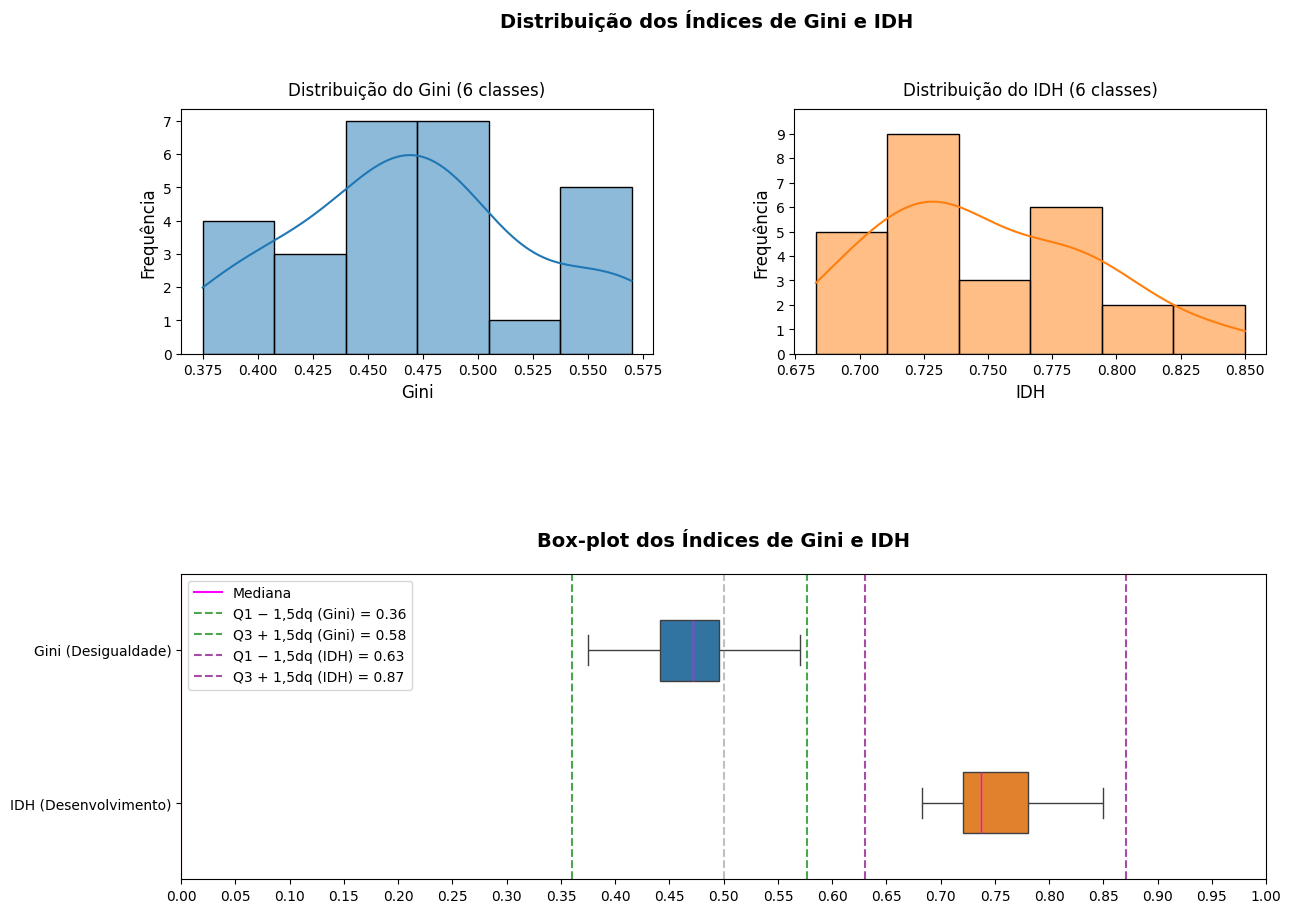

In [ ]:
# @title Graficos Histograma e Boxplot dos indíces de Gini e IDH

n = len(Gini_IDH)
classes = int(np.ceil(1 + 3.322 * np.log10(n)))

plt.figure(figsize=(14, 10))
grid = plt.GridSpec(2, 2, height_ratios=[0.8, 1], hspace=0.8, wspace=0.3)
plt.suptitle('Distribuição dos Índices de Gini e IDH', y=0.98, fontsize=14, fontweight='bold')

# --- Histogramas ---
# --- Histograma do Gini ---
ax1 = plt.subplot(grid[0, 0])
sns.histplot(Gini_IDH['Gini'], kde=True, color='#1f77b4', bins=classes, edgecolor='black', ax=ax1)
ax1.set_title(f'Distribuição do Gini ({classes} classes)', pad=10)
ax1.set_xlabel('Gini', fontsize=12)
ax1.set_ylabel('Frequência', fontsize=12)
# --- Histograma do IDH ---
ax2 = plt.subplot(grid[0, 1])
sns.histplot(Gini_IDH['IDH'], kde=True, color='#ff7f0e', bins=classes, edgecolor='black', ax=ax2)
ax2.set_title(f'Distribuição do IDH ({classes} classes)', pad=10)
ax2.set_xlabel('IDH', fontsize=12)
ax2.set_ylabel('Frequência', fontsize=12)
ax2.set_yticks(np.arange(0, 10, 1))
ax2.set_ylim(0, 10)

# --- Box-plot ---
ax3 = plt.subplot(grid[1, :])
outliers = dict(marker='o', markerfacecolor='black', markersize=6, linestyle='none')  # outliers
sns.boxplot(data=Gini_IDH[['Gini', 'IDH']], palette=['#1f77b4', '#ff7f0e'], width=0.4, orient="h", ax=ax3, medianprops=dict(color='#FF00FF'), showfliers=True, flierprops=outliers)
ax3.set_title(f"Box-plot dos Índices de Gini e IDH", fontweight='bold', fontsize=14, pad=20)
ax3.set_yticklabels(['Gini (Desigualdade)', 'IDH (Desenvolvimento)'])
ax3.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
ax3.set_xticks(np.arange(0, 1.05, 0.05))
ax3.set_xlim(0, 1)
# --- Legendas Box-plot ---
ax3.axvline(color='#FF00FF', linestyle='-', alpha=1, label='Mediana')
linha_aux_Gini_inf = np.percentile(Gini_IDH['Gini'], 25) - 1.5 * (np.percentile(Gini_IDH['Gini'], 75) - np.percentile(Gini_IDH['Gini'], 25))
linha_aux_Gini_sup = np.percentile(Gini_IDH['Gini'], 75) + 1.5 * (np.percentile(Gini_IDH['Gini'], 75) - np.percentile(Gini_IDH['Gini'], 25))
linha_aux_IDH_inf = np.percentile(Gini_IDH['IDH'], 25) - 1.5 * (np.percentile(Gini_IDH['IDH'], 75) - np.percentile(Gini_IDH['IDH'], 25))
linha_aux_IDH_sup = np.percentile(Gini_IDH['IDH'], 75) + 1.5 * (np.percentile(Gini_IDH['IDH'], 75) - np.percentile(Gini_IDH['IDH'], 25))
ax3.axvline(linha_aux_Gini_inf, color='green', linestyle='--', alpha=0.7, label=f'Q1 − 1,5dq (Gini) = {linha_aux_Gini_inf:.2f}')
ax3.axvline(linha_aux_Gini_sup, color='green', linestyle='--', alpha=0.7, label=f'Q3 + 1,5dq (Gini) = {linha_aux_Gini_sup:.2f}')
ax3.axvline(linha_aux_IDH_inf, color='purple', linestyle='--', alpha=0.7, label=f'Q1 − 1,5dq (IDH) = {linha_aux_IDH_inf:.2f}')
ax3.axvline(linha_aux_IDH_sup, color='purple', linestyle='--', alpha=0.7, label=f'Q3 + 1,5dq (IDH) = {linha_aux_IDH_sup:.2f}')
ax3.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()


### Análise das Distribuições:

#### **Índice de Gini (Desigualdade de Renda):**
1. **Histograma**:
   - O histograma está centrado aproximadamente entre **0,450** e **0,50**, levando em conta o país com maior desigualdade, a **África do Sul**, com índice de **0,630**, e o país com menor desigualdade, a **Eslováquia**, com índice de **0,232**. Ao comparar os estados brasileiros com esses países, observa-se que a maior parte dos estados apresenta um índice consideravelmente alto, mas ainda abaixo do pior índice registrado.
   - A curva de densidade mostra um leve pico em torno de **0,47**.

2. **Boxplot**:
   - Mediana: ≈ 0,47  
   - A maioria dos valores está entre **0,44** e **0,49**, ou seja, os dados estão mais concentrados nessa faixa de valores.
   - Não apresenta outliers segundo a definição usual da estatística, já que todos os valores estão dentro dos limites estabelecidos.
   - Ao considerar Gini = 0,5 (desigualdade elevada) e Gini = 0,2 (distribuição de renda mais equitativa), os resultados sugerem que a maioria dos estados brasileiros demonstra um grau de desigualdade próximo do elevado.
   - Alguns valores, embora não sejam outliers, se aproximam dos extremos, como **Santa Catarina**, com índice = **0,375** (melhor desempenho), e o **Distrito Federal**, com índice = **0,570** (pior desempenho).
   - Limite inferior = **0,36**
   - Limite superior = **0,58**

#### **IDH (Desenvolvimento Humano):**
1. **Histograma**:
   - O histograma está centrado aproximadamente entre **0,70** e **0,78**, levando em conta a classificação do IDH:  
     - Acima de 0,800: **muito alto**  
     - Entre 0,700 e 0,799: **alto**  
     - Entre 0,550 e 0,699: **médio**  
     - Abaixo de 0,550: **baixo**  
     Isso indica que a maioria dos estados brasileiros está classificada com IDH **alto**.
   - A curva de densidade mostra um leve pico em torno de **0,72**.

2. **Boxplot**:
   - Mediana: ≈ 0,73  
   - O IDH apresenta uma dispersão maior dos dados em comparação ao Gini.
   - A maioria dos valores está entre **0,72** e **0,77**, concentrando-se nessa faixa.
   - Não apresenta outliers segundo a definição usual da estatística.
   - A distância maior até o limite superior (**0,87**) indica que poucos estados têm IDH muito alto.
   - Alguns valores, embora não sejam outliers, se aproximam dos extremos, como **Alagoas**, com índice = **0,683** (pior desempenho), e o **Distrito Federal**, com índice = **0,850** (maior IDH).
   - Limite inferior = **0,63**
   - Limite superior = **0,87**

**Fontes:**  
> https://pt.countryeconomy.com/demografia/indice-de-gini  
> https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_%C3%8Dndice_de_Desenvolvimento_Humano

In [ ]:
# @title c)

def calcular_posicao(Gini_IDH):
    moda = ', '.join(map(lambda x: f"{x:.3f}", Gini_IDH.mode())) if not Gini_IDH.mode().empty else "N/A"

    return {
        'Média': f"{Gini_IDH.mean():.3f}",
        'Mediana': f"{Gini_IDH.median():.3f}",
        'Moda': moda,
        'Q1': f"{Gini_IDH.quantile(0.25, interpolation='linear'):.3f}",
        'Q3': f"{Gini_IDH.quantile(0.75, interpolation='linear'):.3f}",
    }

def calcular_dispersao(Gini_IDH):
    return {
        'Amplitude': f"{Gini_IDH.max() - Gini_IDH.min():.3f}",
        'IIQ': f"{Gini_IDH.quantile(0.75) - Gini_IDH.quantile(0.25):.3f}",
        'Variância': f"{Gini_IDH.var(ddof=1):.6f}",
        'Desvio Padrão': f"{Gini_IDH.std(ddof=1):.6f}",
        'Coef. Variação': f"{(Gini_IDH.std()/Gini_IDH.mean())*100:.2f}%"
    }

In [ ]:
# 1. Posição
medidas_pos = list(calcular_posicao(Gini_IDH['Gini']).keys())
tabela_posicao = pd.DataFrame(index=medidas_pos)
tabela_posicao['Gini'] = list(calcular_posicao(Gini_IDH['Gini']).values())
tabela_posicao['IDH'] = list(calcular_posicao(Gini_IDH['IDH']).values())

# 2. Dispersão
medidas_disp = list(calcular_dispersao(Gini_IDH['Gini']).keys())
tabela_dispersao = pd.DataFrame(index=medidas_disp)
tabela_dispersao['Gini'] = list(calcular_dispersao(Gini_IDH['Gini']).values())
tabela_dispersao['IDH'] = list(calcular_dispersao(Gini_IDH['IDH']).values())

# ---
from IPython.display import display, HTML

display(HTML("<h3><b>Medidas de Posição:</b></h3>"))
display(tabela_posicao)

display(HTML("<h3><b>Medidas de Dispersão:</b></h3>"))
display(tabela_dispersao)

,Gini,IDH
Média,0.472,0.749
Mediana,0.472,0.737
Moda,"0.447, 0.474, 0.487","0.737, 0.787"
Q1,0.442,0.720
Q3,0.495,0.780


,Gini,IDH
Amplitude,0.195,0.167
IIQ,0.054,0.060
Variância,0.003101,0.001883
Desvio Padrão,0.055683,0.043391
Coef. Variação,11.79%,5.79%


### **Análise das Medidas de Posição e Dispersão para Gini e IDH**

#### **Índice de Gini (Desigualdade de Renda)**:
1. **Medidas de Posição:**

  - A média ser igual à mediana significa uma simetria nos dados. Além disso, ao considerar Gini = 0,5 (desigualdade de renda elevada) e Gini = 0,2 (renda distribuída de forma mais equitativa), o valor da média e da mediana ser igual a 0,472 sugere um grau de desigualdade elevado, corroborando com o que foi analisado nos gráficos.
  - A amostra é trimodal.
  - Q1: 25% dos estados têm Gini ≤ 0,442, indicando que apenas 25% dos estados não atingem uma desigualdade média.
  - Q3: 75% dos estados têm Gini ≤ 0,495, indicando que 75% dos estados também não atingem uma desigualdade muito alta.

2. **Medidas de Dispersão:**

  - A amplitude de 0,195 pode ser considerada alta, já que representa praticamente 20% da escala do índice, o que indica uma grande discrepância entre o maior e o menor valor.
  - Já o intervalo interquartil, com valor de 0,054, demonstra uma menor dispersão dos dados entre os 50% centrais.
  - A variância observada para o índice de Gini é de 0,003101, o que indica uma dispersão de média a baixa nos dados. O desvio padrão corrobora essa análise, considerando que seu valor é de aproximadamente 0,056, o que significa que, em média, os valores se afastam da média por cerca de 5,6% da escala total. Isso confirma que há uma dispersão a se considerar, embora baixa.
  - O Coeficiente de Variação = 11,79% reforça que os dados têm uma variação a se considerar, porém não extrema.

#### **IDH (Desenvolvimento Humano)**:
1. **Medidas de Posição:**
  - Média (0,749) > Mediana (0,737): Isso indica que a distribuição apresenta outliers que puxam a média para cima.
  - Ao considerar um valor acima de 0,800 = muito alto, entre 0,700 e 0,799 = alto, 0,550 a 0,699 = médio e abaixo de 0,550 = baixo, tanto a média quanto a mediana são consideradas valores altos.
  - A amostra é bimodal.
  - Q1: 25% dos estados têm IDH ≤ 0,720.
  - Q3: 75% dos estados têm IDH ≤ 0,780.

2. **Medidas de Dispersão:**
  - A amplitude de 0,167 pode ser considerada relativamente alta, pois representa cerca de 17% da escala do índice, indicando considerável diferença entre o maior e o menor valor. Porém, apresenta uma variação um pouco menor entre os extremos quando comparada ao índice de Gini.
  - Já os 50% centrais, com valor de 0,060, apresentam uma variação maior ao se comparar os valores com o índice de Gini.
  - Ao analisar a variância = 0,001883, conjuntamente com o desvio padrão = 0,043391, que representa uma variação de 4,3%, observa-se uma similaridade com o índice de Gini, embora o valor seja mais de 1% menor.
  - O Coeficiente de Variação = 5,79% mostra que a variação é consideravelmente menor em comparação ao índice de Gini, sendo considerada uma variação baixa. Isso mostra que a diferença de 1% no desvio padrão é considerável.

#### d)

In [ ]:
# @title Correlação de Pearson

Gini_IDH_sorted = Gini_IDH.sort_values(by='IDH', ascending=False).reset_index(drop=True)
correlacao = Gini_IDH['Gini'].corr(Gini_IDH['IDH'], method='pearson')

print(f"Coeficiente de correlação de Pearson: {correlacao:.3f}")

if abs(correlacao) == 1 or abs(correlacao) == -1:
  print("correlação perfeita")
elif 0.7 <= abs(correlacao) < 1:
  print("Correlacao Forte")
elif 0.4 <= abs(correlacao) < 0.7:
  print("Correlação Moderada.")
elif 0.2 <= abs(correlacao) < 0.4:
  print("Correlação Fraca.")
elif 0< abs(correlacao) < 0.2:
  print("Correlação Desprezível")

if correlacao > 0:
  print("Correlação diretamente proporcional a medida que um índice cresce o outro também cresce")
elif correlacao < 0:
  print("Correlação inversamente proporcional a medida que um índice cresce o outro diminui")


Coeficiente de correlação de Pearson: -0.456
Correlação Moderada.
Correlação inversamente proporcional a medida que um índice cresce o outro diminui


#### e) f)

Tanto o índice de Gini quanto o IDH não apresentam outliers, segundo a definição usual da estatística, pois todos os valores estão dentro dos extremos. Porém, alguns valores, embora não sejam outliers, se mostram próximos dos valores extremos.

**Gini**:  
- **Valores baixos**:  
  - Santa Catarina = 0.375  
  - Rio Grande do Sul = 0.388  
  - São Paulo = 0.394  

- **Valores altos**:  
  - Distrito Federal = 0.570  
  - Piauí = 0.566  
  - Bahia = 0.559  

---

**IDH**:  
- **Valores baixos**:  
  - Alagoas = 0.683  
  - Maranhão = 0.687  
  - Pará = 0.698  
  - Piauí = 0.697  

- **Valores altos**:  
  - Distrito Federal = 0.850  
  - Santa Catarina = 0.808  
  - São Paulo = 0.826  

---

O Distrito Federal se destaca por ter o maior IDH de todos e um dos maiores índices de Gini, o que indica alto desenvolvimento e alta desigualdade, possivelmente puxando a correlação para mais próxima de 0. Enquanto isso, o Piauí, com baixo desenvolvimento e alta desigualdade, e São Paulo e Santa Catarina, com alto desenvolvimento e baixa desigualdade, corroboram a relação inversamente proporcional observada na correlação.

Assim, isso indica que, em média, os estados da região Norte/Nordeste apresentam baixo IDH e alto Gini, enquanto as regiões Sul/Sudeste apresentam alto IDH e baixo Gini, sendo regiões com padrões consistentes.


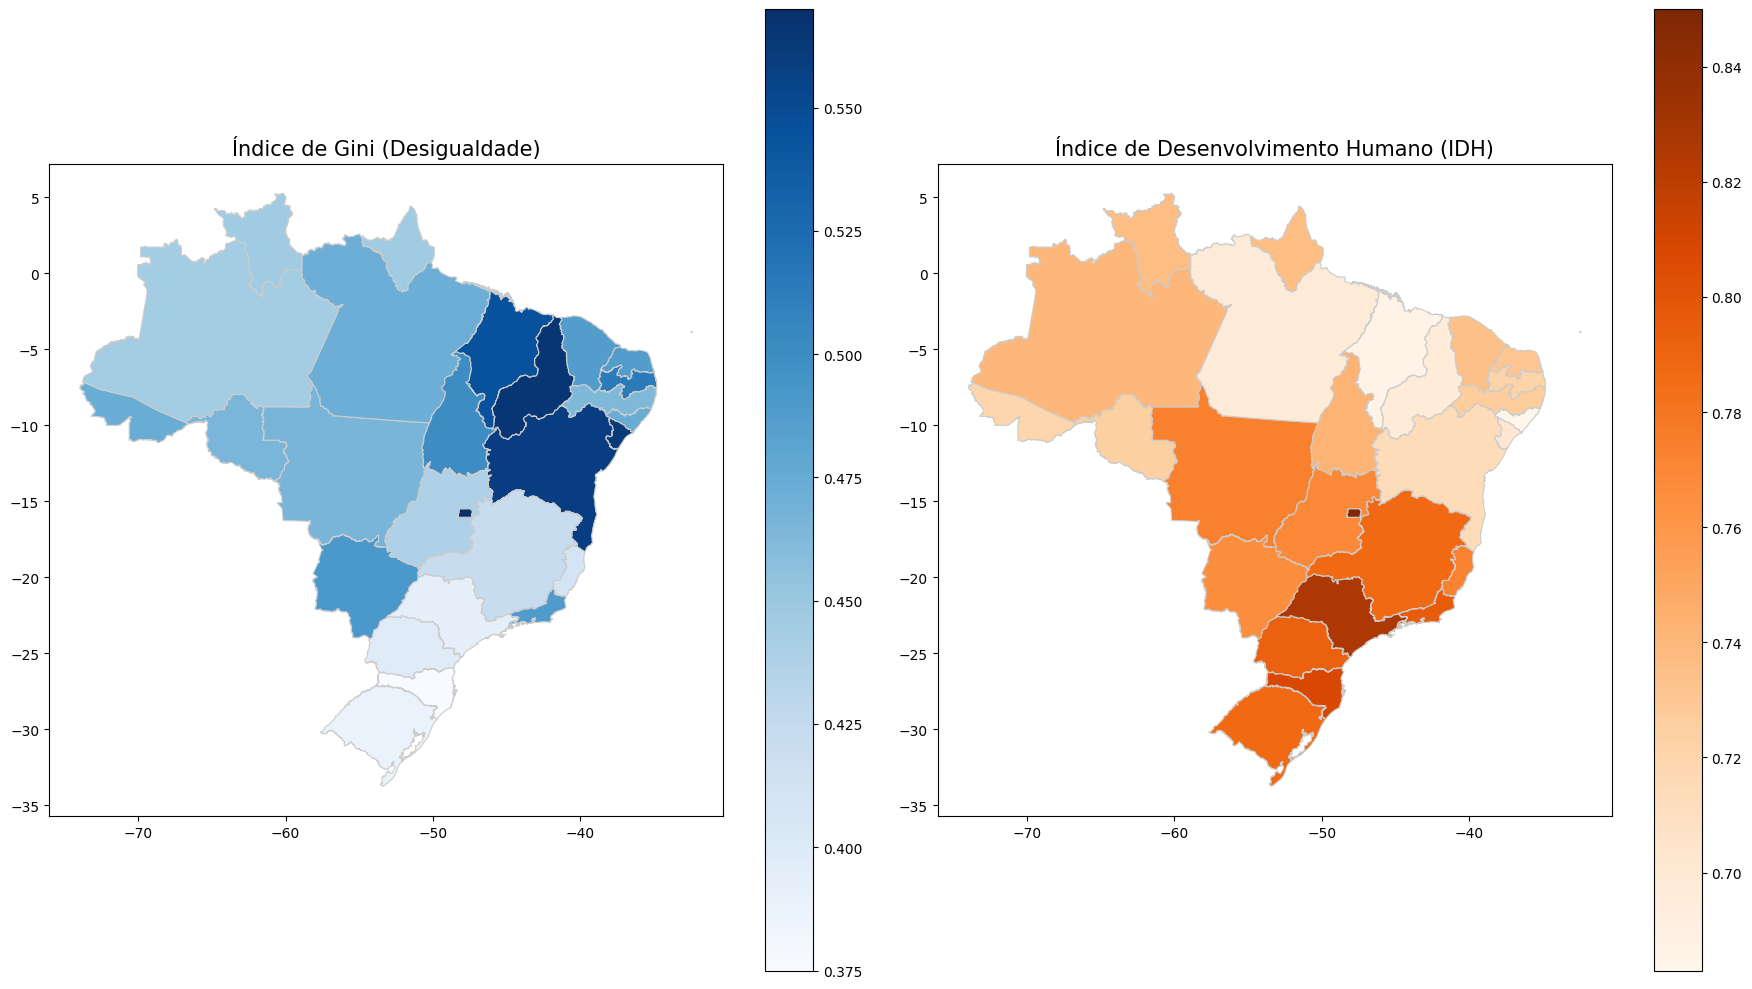

In [ ]:
# @title g)

br = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')
br['name'] = br['name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
Gini_IDH['Estado'] = Gini_IDH['Estado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
br = br.merge(Gini_IDH, left_on='name', right_on='Estado')
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# --- Mapa do Gini ---
br.plot(column='Gini', cmap='Blues', linewidth=0.8, ax=axes[0], edgecolor='0.8', legend=True)
axes[0].set_title('Índice de Gini (Desigualdade)', fontsize=15)

# --- Mapa do IDH ---
br.plot(column='IDH', cmap='Oranges', linewidth=0.8, ax=axes[1], edgecolor='0.8', legend=True)
axes[1].set_title('Índice de Desenvolvimento Humano (IDH)', fontsize=15)


plt.tight_layout()
plt.show()


Há indícios de uma correlação com a possibilidade levantada de que, em média, os estados das regiões Norte e Nordeste apresentam um menor IDH e maior índice de Gini, enquanto as regiões Sul e Sudeste apresentam um IDH mais elevado e menor índice de Gini. Já a região Centro-Oeste tende a apresentar um IDH de moderado a alto e um índice de Gini de moderado a baixo.

<ipython-input-34-be1e4726239e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Quartil_IDH', y='Gini', data=Gini_IDH, palette='Blues')


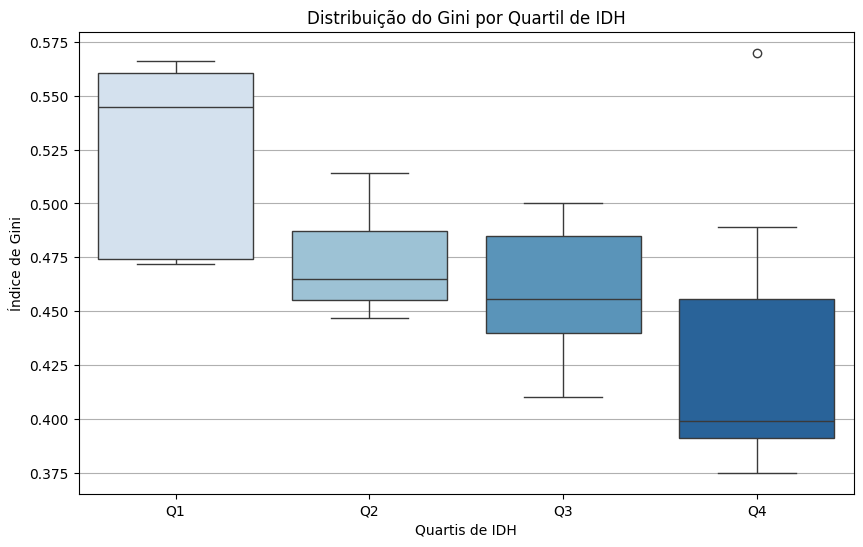

In [ ]:
# @title h)
Gini_IDH['Quartil_IDH'] = pd.qcut(Gini_IDH['IDH'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Quartil_IDH', y='Gini', data=Gini_IDH, palette='Blues')
plt.title('Distribuição do Gini por Quartil de IDH')
plt.xlabel('Quartis de IDH')
plt.ylabel('Índice de Gini')
plt.grid(axis='y')
plt.show()


Como visto na correlação de Pearson, os índices apresentam uma ligação moderada. Isso pode ser observado ao ver que, à medida que o IDH aumenta, o índice de Gini tende a diminuir. Essa correlação não é tão alta, já que isso ocorre de maneira gradual e não tão intensa.

Alem disso apresenta um outilier no Q4 sendo possivelmente o Distrito Federal.